## Tranin/Test Splits

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

In [3]:
df.head()

,SEX,AGE,PROMOTIONS,YEARS_EMPLOYED,DID_QUIT
0,0,25,2,3,0
1,0,30,2,3,0
2,0,26,2,3,0
3,0,25,1,2,0
4,0,28,1,2,0


In [4]:
X = df.values[:, :-1]
Y = df.values[:, -1]

In [5]:
model = LogisticRegression(penalty=None)

In [6]:
# shuffle the data first (in case the data is ordered), then split them to 3 parts
# 2 parts as training, 1 part as testing. so total 3 times of training and 3 result
kfold = KFold(n_splits=3, random_state=7, shuffle=True) 

In [7]:
results = cross_val_score(model, X, Y, cv=kfold)

In [8]:
results

array([0.61111111, 0.61111111, 0.61111111])

<br>
<br>

## Confusion Matrices

#### accuracy is a bad measure for classification
#### confusion matrices only apply to testing dataset

#### Terms:
##### $precision = \frac{TP}{(TP + FP)}$
##### $recall/sensitivity = \frac{TP}{(TP + FN)}$
##### $specificity = \frac{TN}{TN + FP}$
##### $negative predicted value = \frac{TN}{TN + FN}$
##### $accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
##### $F1\ score = \frac{2 * (Precision * Recall)}{Precision + Recall}$

<br>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")

In [11]:
df.head()

,SEX,AGE,PROMOTIONS,YEARS_EMPLOYED,DID_QUIT
0,0,25,2,3,0
1,0,30,2,3,0
2,0,26,2,3,0
3,0,25,1,2,0
4,0,28,1,2,0


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.33)

In [14]:
model = LogisticRegression(penalty=None)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [16]:
y_pred = model.predict(X_test)

In [17]:
matrix = confusion_matrix(y_test, y_pred)

In [18]:
matrix

array([[7, 2],
       [5, 4]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.67      0.44      0.53         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18



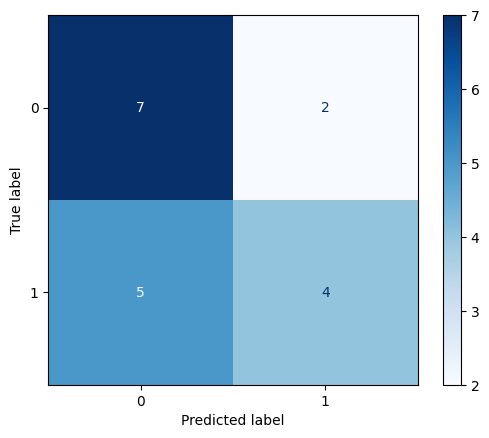

In [20]:
dist = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
dist.plot(cmap='Blues')
plt.show()

### Using ROC & AUC

In [21]:
result = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')

In [76]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [78]:
#df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")


X,y = make_classification(n_samples=1_000, n_features=20, n_classes=2)
#y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True, test_size=0.33)
logic = LogisticRegression(penalty=None)
model = logic.fit(X_train, y_train)

In [79]:
# Cross Validation Score
kfold = KFold(n_splits=4, shuffle=True)
scores = cross_val_score(model, X, y, cv=kfold)
print(scores)

[0.924 0.924 0.9   0.896]


In [80]:
# Forecast values
y_pred = model.predict(X_test)

In [81]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[146  18]
 [  6 160]]


In [82]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       164
           1       0.90      0.96      0.93       166

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



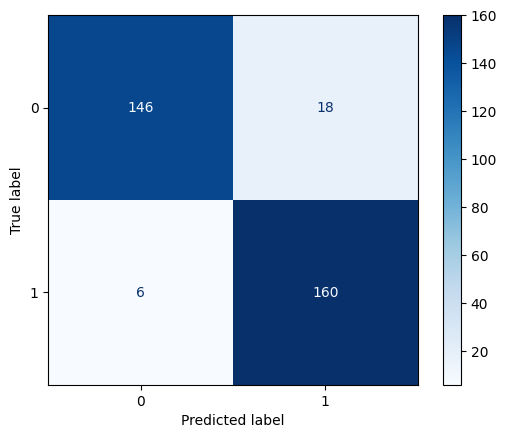

In [83]:
# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [84]:
y_prod = model.predict_proba(X_test)
y_prod = y_prod[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prod)

In [94]:
roc_auc = roc_auc_score(y_test, y_prod)
print(roc_auc)

0.9682632970908023


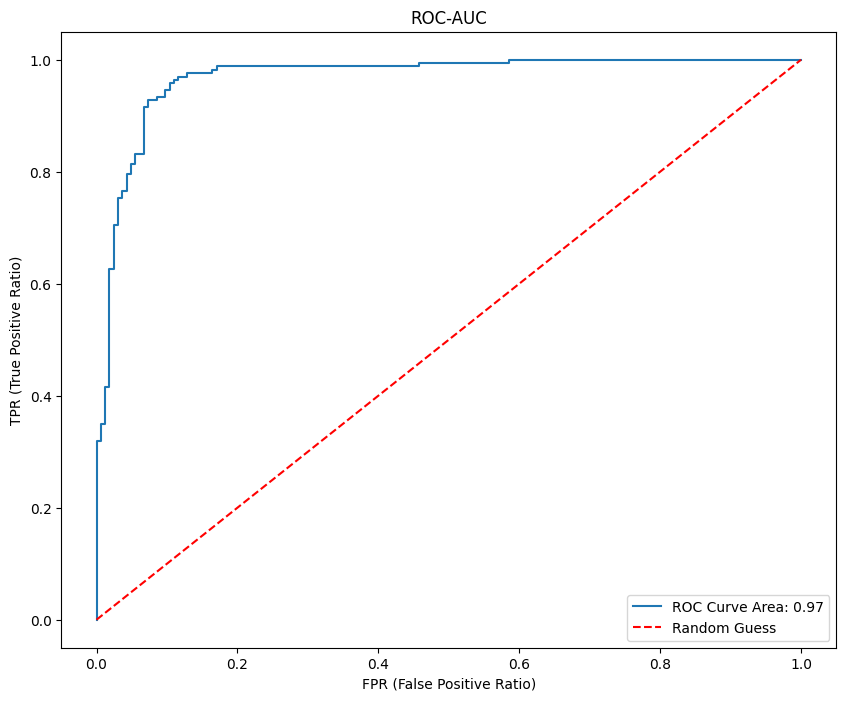

In [100]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(fpr, tpr, label=f'ROC Curve Area: {round(roc_auc,2)}')
ax.plot([0,1],[0,1], color='red', linestyle='--', label='Random Guess')

ax.set_title('ROC-AUC')
ax.set_xlabel('FPR (False Positive Ratio)')
ax.set_ylabel('TPR (True Positive Ratio)')
plt.legend(loc='lower right')
plt.show()